<a href="https://colab.research.google.com/github/rvoloder/sales-predictions/blob/main/(3_0)Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
filename = "/content/drive/MyDrive/Coding Dojo/01 Stack Week 2: Pandas/sales_predictions.csv"

df = pd.read_csv(filename)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
## 1. How many rows and columns?

df.shape

## 8523 rows, 12 columns

(8523, 12)

In [ ]:
## 2. What are the datatypes of each variable?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## 3. Are there any duplicates?

df.duplicated().sum()

## No!

0

In [ ]:
## 4. Identify missing values.

## From above (df.info()), Item_Weight and Outlet_Size have missing values.

In [ ]:
## 5. How to address the missing values?

## For Item_Weight, I don't believe that the weight of the item will have any effect on the sale of it (i.e. sales predictions).
## Although I have the impulse to drop the column, in an effort to keep as much data as possible, I will use the average of the weights for the missing values.

average_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(average_weight, inplace = True)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## For Outlet_Size, this appears to be more relevant.
## First I will check what how the Outlet_Size is categorized and how much of each category is present.

df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
## The above count does not show that a mode (most common value) would be of use here.
## If we look back on our data, we see that although we do not have all the Outlet_Sizes, we do have every Outlet_Type of each item.
## If we look at the value counts of our Outlet_Types, we notice an interesting pattern.

df.groupby('Outlet_Size')['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
Name: Outlet_Type, dtype: int64

In [ ]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
## From the info above, we can first see that if a type is a 'Grocery Store', the size category is always small.
## It would be logical to infer that any 'Grocery Store' type would be a small size store.
## This also makes sense with the name, as a 'Supermarket' is usually a large 'Grocery Store'.
## Using this inference, we will replace the missing values for Outlet_Size with 'Small', if the Outlet_Type is 'Grocery Store'.

grocery_store_filter = df['Outlet_Type'] == 'Grocery Store'

df.loc[grocery_store_filter, 'Outlet_Size'] = 'Small'
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6668 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## Using this same logic we see that all Supermarket Type2 and Supermarket Type3 appear to be medium sized.
## Unfortunately, when we look further, all Supermarket Type2 and Type3 have been categorized as medium.

df.groupby('Outlet_Size')['Outlet_Type'].value_counts()


Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store        1083
Name: Outlet_Type, dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Small     2943
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
## If we look deeper into the location types, we notice that Tier 2 locations always appear to be 'Small' size.

df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
                      Small           555
Name: Outlet_Size, dtype: int64

In [ ]:
## If we attempt to change the Tier 2 locations to small, we see that we have filled in all of our missing data!
## YAY!!!!!!!!!!

tier2_filter = df['Outlet_Location_Type'] == 'Tier 2'

df.loc[tier2_filter, 'Outlet_Size'] = 'Small'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## 6. Confirm that there are no missing values.

df.info()

##YAY!!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## 7. Find and fix any inconsistent categories of data.

data_types = df.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
str_cols = data_types[data_types == 'object']
str_cols

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
str_cols.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[str_cols.index]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [ ]:
str_cols = str_cols.index

In [ ]:
for col in str_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna = False))
  print("\n\n")

Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT01

In [ ]:
## Item_Fat_Content appears to have the most mistakes in input:
## Let's adjust these:

In [ ]:
## Change 'LF' and 'low fat' to 'Low Fat':
## As well as 'reg' to "Regular":

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
## 8. for numerical columns, obtain summary statistics:

df.describe().round(4)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.0000,8523.0000,8523.0000,8523.0000,8523.0000
mean,12.8576,0.0661,140.9928,1997.8319,2181.2889
std,4.2261,0.0516,62.2751,8.3718,1706.4996
min,4.5550,0.0000,31.2900,1985.0000,33.2900
25%,9.3100,0.0270,93.8265,1987.0000,834.2474
50%,12.8576,0.0539,143.0128,1999.0000,1794.3310
75%,16.0000,0.0946,185.6437,2004.0000,3101.2964
max,21.3500,0.3284,266.8884,2009.0000,13086.9648


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

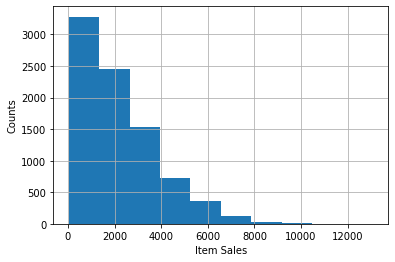

In [ ]:
df['Item_Outlet_Sales'].hist();
plt.xlabel('Item Sales');
plt.ylabel('Counts');

The above graph shows that a majority of Items fall in the range of 0 to 4000 in sales. This shows that we really only have a few items that we would consider bestsellers. It would be interesting to evaluate which products make more than 4000 or even 6000 and try and figure out a correlation to other factors. Maybe we can discover a way to better sales for the less popular items.

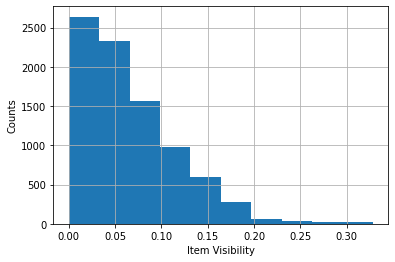

In [ ]:
df['Item_Visibility'].hist();
plt.xlabel('Item Visibility');
plt.ylabel('Counts');

The histogram above shows that a majority of the products have low item visibility (i.e. that they have lower amounts of shelf space to display the products percentage-wise). Something like this could be a good indicator of higher or lower sales predictions. The logical assumption would be that the more "visible" the product is, the better it sells. But we seem to have very little items that are highly visible, which could be affecting sales.

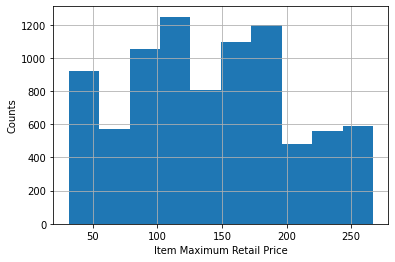

In [ ]:
df['Item_MRP'].hist();
plt.xlabel('Item Maximum Retail Price');
plt.ylabel('Counts');

The chart above shows that the maximum price at which stores can sell each product vary greatly although most seem to fall in the middle range between 75 and 190. It would be interesting to take a look and compare how items with higher and lower retail prices sell comparatively. Are the bestsellers located in the higher or lower MRP range?

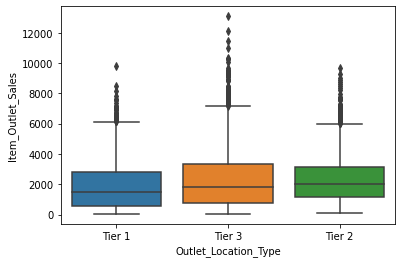

In [ ]:
sns.boxplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales');

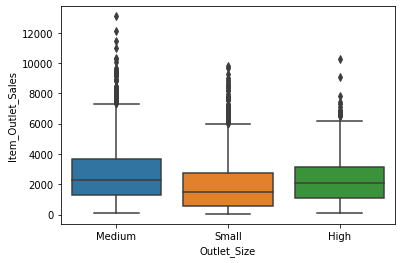

In [ ]:
sns.boxplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales');

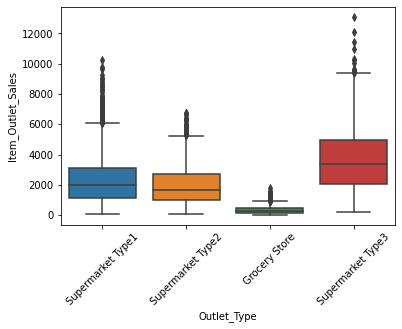

In [ ]:
sns.boxplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales');
plt.xticks(rotation = 45);

The three boxplots above further confirm that our outliers (i.e. our bestsellers) usually fall in the range above 6000 in item sales. It also shows that "Medium" sized outlets tend to have higher sales per item then "Small" or "Big" outlets. We can also see that Tier 1 stores tend to be the worst performing, their 25 to 75 percentile range falling a bit lower than those of Tier 2 and Tier 3 stores. Tier 3 stores appear to have the most amount of outliers (high selling items) and it would be a good idea to investigate why that is. The final boxplot also shows us that "Supermarket Type 3" stores seem to be by far the best sellers among the stores whereas the "Grocery Store" seems to be by far the worst performing. It might even be a good idea to take a look and see if the Grocery Stores are even worth having. And to see why it is that the Type 3 stores seem to be the most successful (i.e. is it because of item type, visibility, something else?).

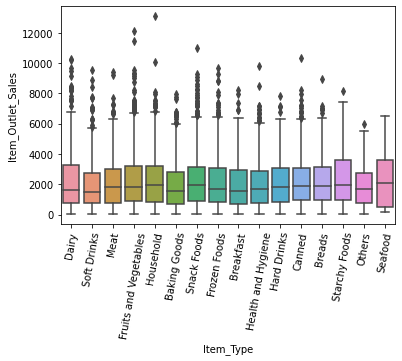

In [ ]:
sns.boxplot(data = df, x = 'Item_Type', y = 'Item_Outlet_Sales');
plt.xticks(rotation = 80);

The boxplot above shows us a good distribution of item sales per type. From this we can see a few interesting points. Some of our better sellers on average seem to be in the seafood, dairy, and starchy foods categories. This would be an interesting thing to explore and see if these items tend to have better item visibility or are located in certain types of stores that allow them to sell better. We can also see clearly where our biggest outliers are located. We should take a look at which items in certain categories (esp. fruits and vegetables, household, and snack foods) account fo rmost of our sales and what it is about these items that make them such good sellers. These factors we can then implement on items that seem to be selling not as well. 

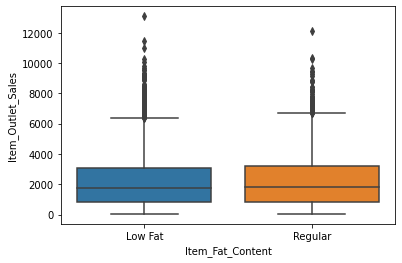

In [ ]:
sns.boxplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

In comparing the fat content of items on sales, we see that the distribution is fairly even. It does appear that a few more outliers (higher selling items) appear to be "Low Fat" items, which would be interesting to take a look at. But it does not appear that one cateogry is far superior to the other in sales. 

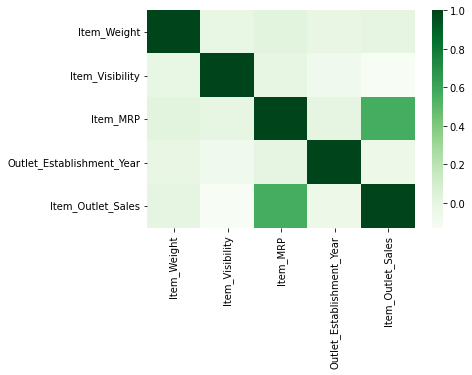

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens');

To investigate some of our assumptions further, we can create a heatmap to show correlations between various categories in our data. Although it appears that most of the data is only slightly correlated, we see that Item MRP (or Maximum Retail Price is strongly correlated with our Item Outlet Sales. This seems like it will be a key indicator for our sales predictions to come. 

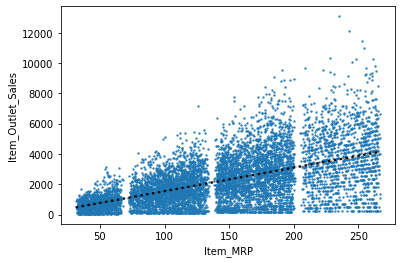

In [ ]:
sns.regplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales',
            scatter_kws = {'s':2},
            line_kws = dict(color = 'black', ls = ':'));

There appears to be a positive correlation between the Item's Maximum Retail Price and the item's Outlet Sales.